In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from upsetplot import from_contents, plot
from matplotlib import pyplot

from pathlib import Path

In [2]:
importance_files = glob.glob(
    "feature_importances/*.tsv"
)

In [3]:

from pathlib import Path

all_importances = []

for importance_file in importance_files:

    path = Path(importance_file)

    panel_type = path.name.split("_")[0]

    importances = pd.read_csv(
        importance_file,
        sep="\t",
    )

    importances['type'] = panel_type

    all_importances.append(importances)


In [4]:
importances

,feature,iteration_0_importance,iteration_0_rank,iteration_1_importance,iteration_1_rank,iteration_2_importance,iteration_2_rank,iteration_3_importance,iteration_3_rank,iteration_4_importance,...,iteration_98_rank,iteration_99_importance,iteration_99_rank,mean_importance,median_importance,stdev_importance,mean_rank,median_rank,stdev_rank,type
0,C163A_HUMAN,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,...,1.0,1.000000,1.0,0.869802,1.000000,0.199166,2.05,1.0,1.552938,bacteremia
1,B2MG_HUMAN,0.499838,4.0,0.604366,3.0,0.632771,2.0,0.214761,7.0,0.729615,...,2.0,0.989583,2.0,0.710873,0.735306,0.262706,3.03,2.0,2.012361,bacteremia
2,CYTC_HUMAN,0.608614,2.0,0.453397,4.0,0.630084,3.0,0.002255,10.0,0.116282,...,3.0,0.718006,4.0,0.618027,0.630874,0.284798,4.03,3.0,2.418176,bacteremia
3,HABP2_HUMAN,0.357752,5.0,0.897978,2.0,0.421690,5.0,0.475691,3.0,0.568159,...,4.0,0.386704,7.0,0.547253,0.515498,0.156251,4.11,4.0,1.441765,bacteremia
4,FCG3A_HUMAN,0.247470,6.0,0.435384,5.0,0.464339,4.0,0.223915,6.0,0.489285,...,5.0,0.737276,3.0,0.522229,0.494129,0.218414,4.41,4.0,1.842786,bacteremia
5,CFAD_HUMAN,0.202310,7.0,0.189797,6.0,0.345836,7.0,0.430473,4.0,0.522906,...,9.0,0.599305,6.0,0.362789,0.314279,0.248518,6.26,7.0,2.393679,bacteremia
6,FBLN3_HUMAN,0.561286,3.0,0.020668,8.0,0.400485,6.0,0.339985,5.0,0.041322,...,7.0,0.609673,5.0,0.343427,0.343450,0.205093,6.52,6.0,2.052247,bacteremia
7,CHLE_HUMAN,0.073856,9.0,0.013922,9.0,0.246707,9.0,0.084682,9.0,0.021730,...,6.0,0.334778,8.0,0.205908,0.172226,0.146456,8.04,8.0,1.722812,bacteremia
8,CXCL7_HUMAN,0.069488,10.0,0.011007,10.0,0.299174,8.0,0.148360,8.0,0.021276,...,10.0,0.196397,10.0,0.189881,0.170150,0.123456,8.18,8.0,1.539907,bacteremia
9,VCAM1_HUMAN,0.077940,8.0,0.081561,7.0,0.015028,10.0,0.560777,2.0,0.126257,...,8.0,0.245454,9.0,0.170470,0.133544,0.148100,8.37,9.0,1.738774,bacteremia


In [5]:
importances_combined = pd.concat(
    [importances[['feature', 'type']] for importances in all_importances]
)

In [6]:
importances_combined[importances_combined['feature'] == "PRG4_HUMAN"]

,feature,type
9,PRG4_HUMAN,abdominal


In [7]:
importance_files

['feature_importances/infection_protein_importances.tsv',
 'feature_importances/abdominal_protein_importances.tsv',
 'feature_importances/sst_protein_importances.tsv',
 'feature_importances/lowerresp_protein_importances.tsv',
 'feature_importances/uti_protein_importances.tsv',
 'feature_importances/ecoli_protein_importances.tsv',
 'feature_importances/bacteremia_protein_importances.tsv']

In [8]:
import networkx as nx

protein_graph = nx.Graph()

top_proteins = {}

dfs = {}

for importance_file in importance_files:

    category = Path(importance_file).stem.split("_")[0]

    category = category[0].upper() + category[1:]

    protein_graph.add_node(category, color="Panel")

    protein_data = pd.read_csv(importance_file, sep="\t")

    dfs[category] = protein_data

    proteins = protein_data['feature'].values

    top_proteins[category] = proteins

    for protein in proteins:
        
        if "_HUMAN" in protein:
            
            protein = protein.split("_")[0]

        protein_graph.add_node(protein, color="Feature")

        protein_graph.add_edge(protein, category)

In [9]:
contents = from_contents(top_proteins)

/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)


In [10]:
unique_panels = list(top_proteins.keys())
unique_panels

['Infection', 'Abdominal', 'Sst', 'Lowerresp', 'Uti', 'Ecoli', 'Bacteremia']

In [11]:
unique_panels = list(top_proteins.keys())
unique_panels

['Infection', 'Abdominal', 'Sst', 'Lowerresp', 'Uti', 'Ecoli', 'Bacteremia']

In [12]:
import colorcet as cc
colors = sns.color_palette(cc.glasbey_hv, n_colors=len(unique_panels))
colors

[(0.188235, 0.635294, 0.854902),
 (0.988235, 0.309804, 0.188235),
 (0.898039, 0.682353, 0.219608),
 (0.427451, 0.564706, 0.309804),
 (0.545098, 0.545098, 0.545098),
 (0.090196, 0.745098, 0.811765),
 (0.580392, 0.403922, 0.741176)]

/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the in

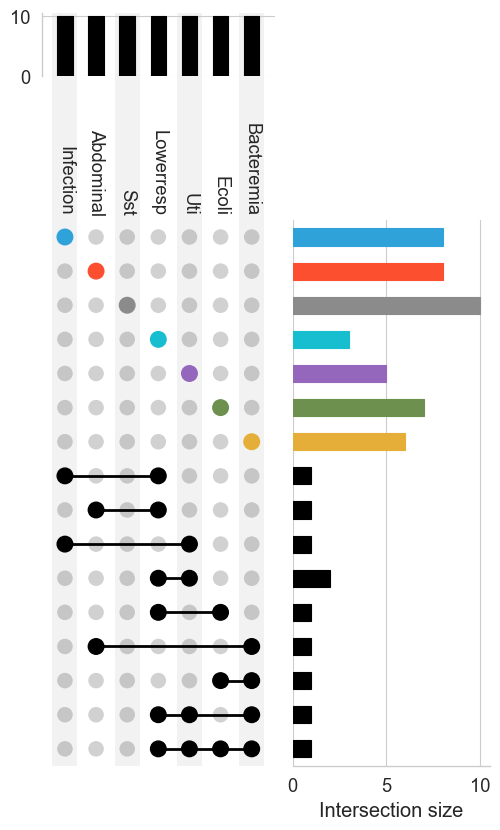

In [13]:
import matplotlib.pyplot as plt
from upsetplot import UpSet, generate_counts

#fig, ax = plt.subplots()

sns.set_theme(font_scale=1.5, context="paper", style="whitegrid")

upset = UpSet(contents, orientation="vertical")

upset.style_subsets(
    present=["Infection"],
    facecolor=colors[0],
    absent=[panel for panel in unique_panels if panel != "Infection"]
)

upset.style_subsets(
    present=["Abdominal"],
    facecolor=colors[1],
    absent=[panel for panel in unique_panels if panel != "Abdominal"]
)

upset.style_subsets(
    present=["Bacteremia"],
    facecolor=colors[2],
    absent=[panel for panel in unique_panels if panel != "Bacteremia"]
)

upset.style_subsets(
    present="Ecoli",
    facecolor=colors[3],
    absent=[panel for panel in unique_panels if panel != "Ecoli"]
)

upset.style_subsets(
    present=["Sst"],
    facecolor=colors[4],
    absent=[panel for panel in unique_panels if panel != "Sst"]
)

upset.style_subsets(
    present=["Lowerresp"],
    facecolor=colors[5],
    absent=[panel for panel in unique_panels if panel != "Lowerresp"]
)

upset.style_subsets(
    present=["Uti"],
    facecolor=colors[6],
    absent=[panel for panel in unique_panels if panel != "Uti"]
)

upset.plot()

fig = plt.gcf()

#plot(contents, fig=fig)

#sns.despine()

In [14]:
fig.savefig("infection_upset_plot.png", dpi=300, transparent=True, bbox_inches="tight")
fig.savefig("infection_upset_plot.pdf", dpi=300, transparent=True, bbox_inches="tight")

In [15]:
cytoscape_data = nx.cytoscape_data(protein_graph)

In [16]:
import json

with open('infection_graph.json', 'w') as f:
    json.dump(cytoscape_data, f)

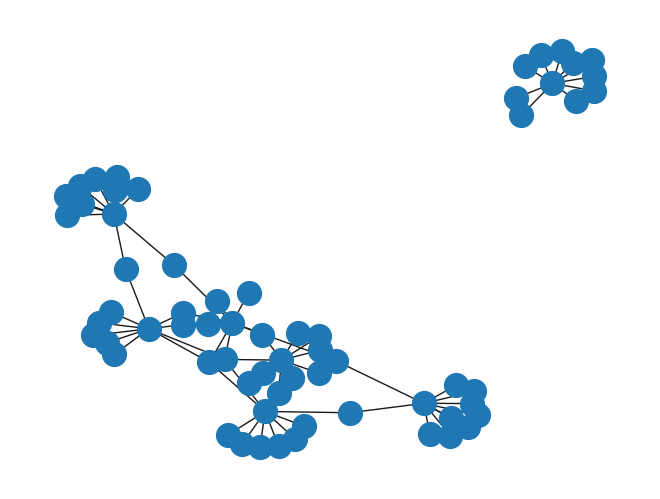

In [17]:
nx.draw(protein_graph)